# Wørdle på dansk

En undersøgelse af hvilke bogstaver der er mest forekomne i det danske sprog - og ikke mindst i 5 bogstavs ord.
Ligeledes gives et bud på de to første optimale gæt, samt sandsynlighede for antal rigtige bogstaver efter at disse to gæt er brugt.


In [1]:
from collections import Counter, OrderedDict

import pandas as pd

### Henter alle danske ord fra retskrivningsordbogen
Data er hentet fra Application Storage `data_meta` fra https://roplus.dk/#ordbog/ og skal således forbehandles

In [2]:
with open("./data/ord.txt") as f:
    lines = f.readlines()
lines = lines[0].split("\\n")[4:]

In [3]:
ord = [l.split("\\")[0].lstrip("0123456789-") for l in lines]
ord = list(OrderedDict.fromkeys(ord))
print(f"Antal ord i retskrivningsordbogen {len(ord):,}")

Antal ord i retskrivningsordbogen 63,860


### Tæl bogstaver
I alt 63860 ord i ordbogen. Lad os tælle nogle bogstaver. Alle ord lægges i en DataFrame så de er nemmere at håndtere og optælle. Der oprettes en kolonne for hvert bogstav og der optælles hvor mange gange dette bogstav forekommer i ordet.

In [4]:
def letter_counts(s: str) -> dict:
    counts = Counter([l for l in s.lower()])
    return counts

In [5]:
%%time
df = pd.DataFrame(ord, columns=["ord"])

# Længde af ord samt optælling af bogstaver
df["len"] = df["ord"].str.len()
df["count"] = df["ord"].apply(letter_counts)

# Split dict til kolonner
df = pd.concat([df.drop(["count"], axis=1), df["count"].apply(pd.Series)], axis=1)

# Sorter bogstavskolonnerne
df = df[["ord", "len"] + [i for i in df.columns[2:].sort_values() if i.isalpha()]]

CPU times: user 5.71 s, sys: 150 ms, total: 5.86 s
Wall time: 5.85 s


In [6]:
df.sample(5)

,ord,len,a,b,c,d,e,f,g,h,...,v,w,x,y,z,å,æ,é,ø,ü
23941,indføle,7,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
28072,kommissarius,12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44213,rensning,8,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55978,tjene,5,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59716,unddragelse,11,1.0,NaN,NaN,2.0,2.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Beskrivelse af længden af ord på dansk
df["len"].describe()

count    63860.000000
mean         9.160883
std          3.158232
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         30.000000
Name: len, dtype: float64

Et gennemsnitligt dansk ord i retskrivbningsordbogen er består af 9 bogstaver

In [8]:
# De fem længste ord i retskrivningsordbogen
df.loc[df["len"].nlargest(5).index, :]

,ord,len,a,b,c,d,e,f,g,h,...,v,w,x,y,z,å,æ,é,ø,ü
50164,social- og sundhedsforvaltning,30,2.0,NaN,1.0,2.0,1.0,1.0,2.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45840,Saint Vincent og Grenadinerne,29,2.0,NaN,1.0,1.0,4.0,NaN,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50163,social- og sundhedsassistent,28,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59993,undervisningsdifferentiering,28,NaN,NaN,NaN,2.0,4.0,2.0,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17484,førstegenerationsindvandrer,27,2.0,NaN,NaN,2.0,4.0,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


### 5 bogstavs ord
Lad os se på bogstavsfordelingen i 5 bogstavs ord

In [9]:
print(f'Antal ord på 5 bogstaver {df[df["len"] == 5].shape[0]:,}')

Antal ord på 5 bogstaver 3,759


In [10]:
# Et par eksempler:
df[df["len"] == 5].sample(5)

,ord,len,a,b,c,d,e,f,g,h,...,v,w,x,y,z,å,æ,é,ø,ü
32825,læske,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
39784,palme,5,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21067,hente,5,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36942,nogle,5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44780,rimte,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Af de ca 64.000 ord i retskrivningsordbogen er der 3759 ord (~6%) med 5 bogstaver. Lad os se på en frekvensoptælling af bogstaverne. Selv om et bogstav forekommer to gange i et ord så optælles det kun som én gang forekomnst.

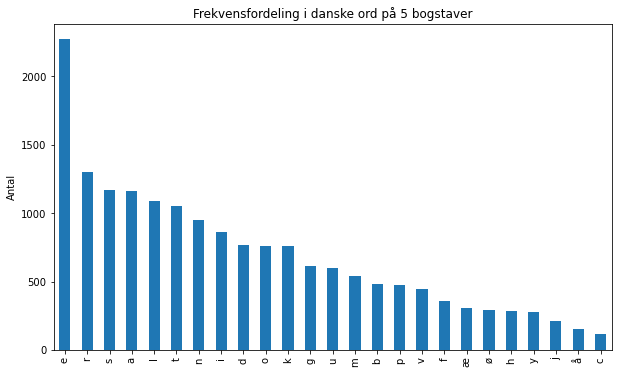

In [11]:
df[df["len"] == 5].iloc[:, 2:].count().sort_values(ascending=False)[:25].plot.bar(
    figsize=(10, 6),
    title="Frekvensfordeling i danske ord på 5 bogstaver",
    ylabel="Antal",
);

In [12]:
# Frekvens i %
df[df["len"] == 5].iloc[:, 2:].count().sort_values(ascending=False)[:5] / df[
    df["len"] == 5
].shape[0]

e    0.604416
r    0.346635
s    0.310987
a    0.310189
l    0.290503
dtype: float64

Dvs. de 10 mest almindelige bogstaver er e, r, s, a, l, t, n, i, d og o. E forekommer i 60% af alle 5 bogstavsord.

Lad os se på fordelingen i alle andre ord som ikke har 5 bogstaver

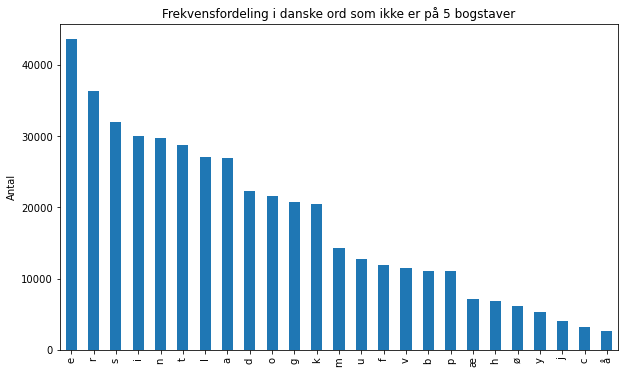

In [13]:
df[df["len"] != 5].iloc[:, 2:].count().sort_values(ascending=False)[:25].plot.bar(
    figsize=(10, 6),
    title="Frekvensfordeling i danske ord som ikke er på 5 bogstaver",
    ylabel="Antal",
);

Interessant, et lidt andet billede. Vi fortsætter med fordelingen med 5 bogstavsord

Her er en funktion der returnerer alle 5 bogstavsord fra retskrivningsordbogen der indeholder de angivne bogstaver.

In [14]:
def check_letters(s: str, len: int = 5) -> str:
    res = []
    for i, row in df[df["len"] == len].iterrows():
        if set(sorted(s.lower())).issubset(sorted(row["ord"].lower())):
            res.append(row["ord"])
    return res

In [15]:
# hvilket ord kan dannes af de fem hyppigske bogstaver i danske ord med fem bogstaver:
check_letters("ersal")

['laser', 'rasle']

In [16]:
# og med de næste fire (der er ingen ord med bogstaverne tnido
check_letters("tnid")

['nutid', 'tinde', 'trind']

Et god bud på de to første ord kunne være "laser" og "nutid". Lad os undersøge hvor mange bogstaver vi vil finde hvis de to ord er de første to gæt.

In [17]:
def count_overlap(s1: str, s2: str) -> int:
    return len(set(s1) & set(s2))

In [18]:
df["laser"] = df.apply(lambda x: count_overlap(x["ord"], "laser"), axis=1)
df["nutid"] = df.apply(lambda x: count_overlap(x["ord"], "nutid"), axis=1)
df["top10"] = df["laser"] + df["nutid"]

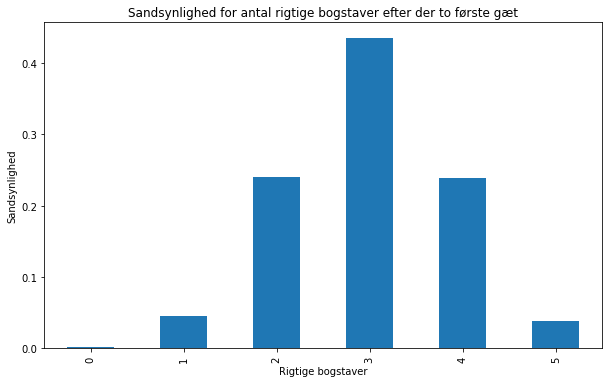

In [19]:
df[df["len"] == 5]["top10"].value_counts(normalize=True).sort_index().plot.bar(
    figsize=(10, 6),
    title="Sandsynlighed for antal rigtige bogstaver efter der to første gæt",
    xlabel="Rigtige bogstaver",
    ylabel="Sandsynlighed",
);

In [20]:
df[df["len"] == 5]["top10"].value_counts(normalize=True).sort_index()[3:].sum()

0.7121574886938016

### Konklusion
Hvis de to første gæt er "laser" og "nutid" vil vi med ~71% sandsynlighed have 3 eller flere rigtige bogstaver